<a href="https://colab.research.google.com/github/TotalySpies/Portfolio-for-Data-Analytics/blob/main/Sales_Profit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from google.colab import drive

drive.mount("/content/drive")
%cd /content/drive/MyDrive/Mate_homework
sales_data_updated = pd.read_csv("sales_data_updated.csv")
sales_data_updated.head()
sales_data_updated.info()

Mounted at /content/drive
/content/drive/MyDrive/Mate_homework
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   order_date           51290 non-null  object 
 1   time                 51290 non-null  object 
 2   aging                51289 non-null  float64
 3   customer_id          51290 non-null  int64  
 4   gender               51290 non-null  object 
 5   device_type          51290 non-null  object 
 6   customer_login_type  51290 non-null  object 
 7   product_category     51290 non-null  object 
 8   product              51290 non-null  object 
 9   sales                51289 non-null  float64
 10  quantity             51288 non-null  float64
 11  discount             51289 non-null  float64
 12  profit               51290 non-null  float64
 13  shipping_cost        51289 non-null  float64
 14  order_priority       51

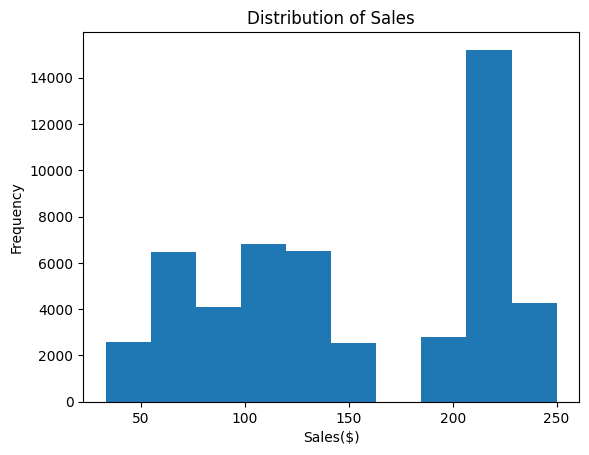

In [2]:
# Plot histogram
plt.hist(sales_data_updated["sales"], bins=10)
plt.title("Distribution of Sales")
plt.xlabel("Sales($)")
plt.ylabel("Frequency")
plt.show()

   order_date     sales
0  2018-01-31  379627.0
1  2018-02-28  332495.0
2  2018-03-31  435502.0
3  2018-04-30  597312.0
4  2018-05-31  824502.0
5  2018-06-30  642555.0
6  2018-07-31  810205.0
7  2018-08-31  664495.0
8  2018-09-30  738303.0
9  2018-10-31  743387.0
10 2018-11-30  877881.0
11 2018-12-31  767147.0


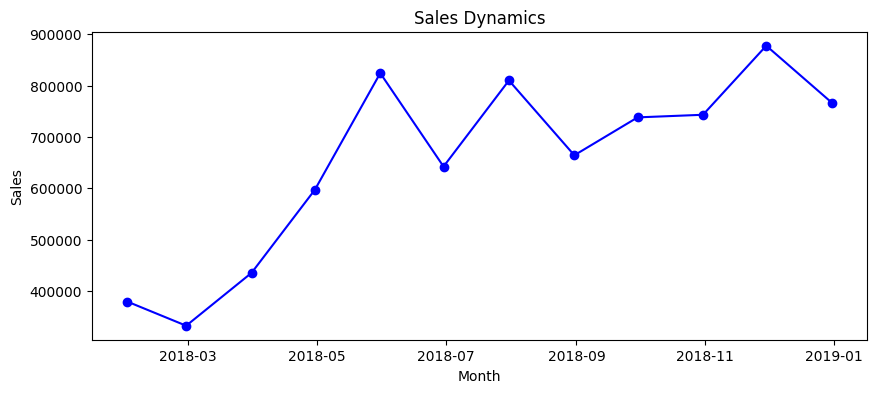

In [3]:
#Line Plot
sales_data_updated["order_date"] = pd.to_datetime(sales_data_updated["order_date"])
sales_by_month = (
    sales_data_updated.resample(rule="ME", on="order_date")["sales"].sum().reset_index()
)
print(sales_by_month)
plt.figure(figsize=(10, 4))
plt.plot(
    sales_by_month["order_date"], sales_by_month["sales"], marker="o", color="blue"
)
plt.title("Sales Dynamics")  # Title of the graph
plt.xlabel("Month")  # X-axis label
plt.ylabel("Sales")  # Y-axis label
plt.show()

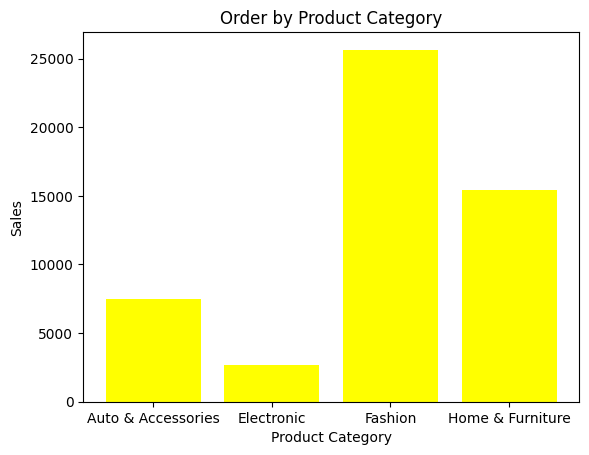

In [4]:
# Plot Bar Chart
count_order = sales_data_updated.groupby("product_category")["sales"].count().reset_index()
plt.bar(count_order["product_category"],count_order["sales"],color="yellow")
plt.title("Order by Product Category")
plt.xlabel("Product Category")
plt.ylabel("Sales")
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

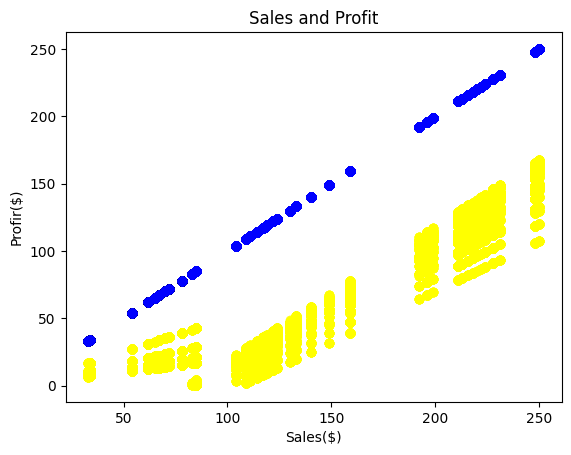

In [5]:
#Scatter Plot
plt.scatter(sales_data_updated["sales"], sales_data_updated["profit"], color="yellow", alpha=0.6, label="Profit")
plt.scatter(sales_data_updated["sales"], sales_data_updated["sales"], color="blue", alpha=0.6, label="Sales")

plt.title("Sales and Profit")
plt.xlabel("Sales($)")
plt.ylabel("Profir($)")
plt.show

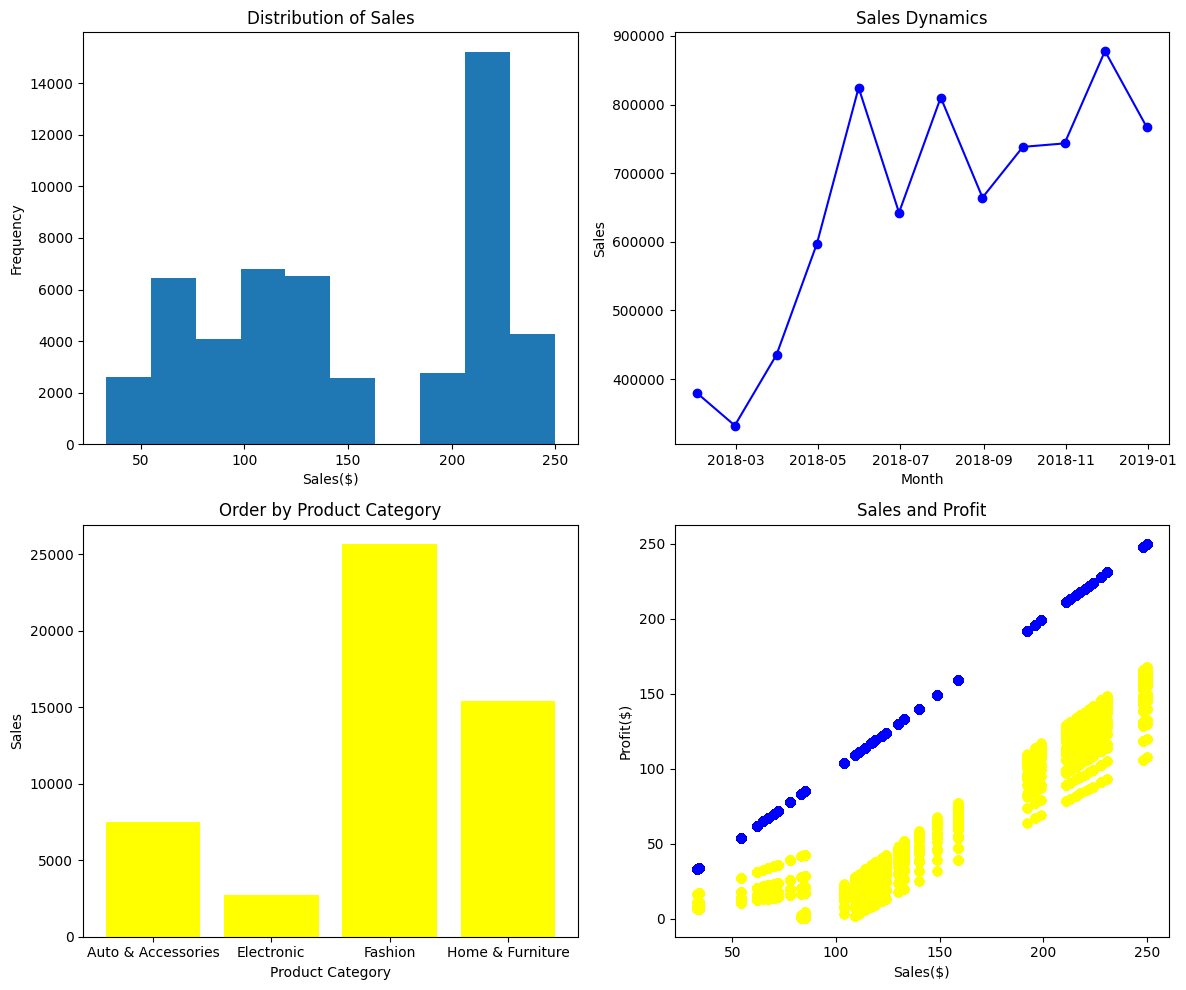

In [6]:

fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Гістограма
axs[0, 0].hist(sales_data_updated["sales"], bins=10)
axs[0, 0].set_title("Distribution of Sales")
axs[0, 0].set_xlabel("Sales($)")
axs[0, 0].set_ylabel("Frequency")

# Лінійний графік
sales_data_updated["order_date"] = pd.to_datetime(sales_data_updated["order_date"])
sales_by_month = sales_data_updated.resample(rule="ME", on="order_date")["sales"].sum().reset_index()
axs[0, 1].plot(
    sales_by_month["order_date"], sales_by_month["sales"], marker="o", color="blue"
)
axs[0, 1].set_title("Sales Dynamics")
axs[0, 1].set_xlabel("Month")
axs[0, 1].set_ylabel("Sales")

# Графік стовпців
count_order = sales_data_updated.groupby("product_category")["sales"].count().reset_index()
axs[1, 0].bar(count_order["product_category"], count_order["sales"], color="yellow")
axs[1, 0].set_title("Order by Product Category")
axs[1, 0].set_xlabel("Product Category")
axs[1, 0].set_ylabel("Sales")

# Діаграма розсіяння
axs[1, 1].scatter(sales_data_updated["sales"], sales_data_updated["profit"], color="yellow", alpha=0.6, label="Profit")
axs[1, 1].scatter(sales_data_updated["sales"], sales_data_updated["sales"], color="blue", alpha=0.6, label="Sales")
axs[1, 1].set_title("Sales and Profit")
axs[1, 1].set_xlabel("Sales($)")
axs[1, 1].set_ylabel("Profit($)")


plt.tight_layout()
plt.show()